In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Reading in the dataset

In [2]:
data = pd.read_csv('all_games.csv')
data

name        platform  \
0            The Legend of Zelda: Ocarina of Time     Nintendo 64   
1                        Tony Hawk's Pro Skater 2     PlayStation   
2                             Grand Theft Auto IV   PlayStation 3   
3                                     SoulCalibur       Dreamcast   
4                             Grand Theft Auto IV        Xbox 360   
...                                           ...             ...   
18795                    Fast & Furious: Showdown        Xbox 360   
18796                     Drake of the 99 Dragons            Xbox   
18797  Afro Samurai 2: Revenge of Kuma Volume One   PlayStation 4   
18798   Infestation: Survivor Stories (The War Z)              PC   
18799         Leisure Suit Larry: Box Office Bust              PC   

             release_date                                            summary  \
0       November 23, 1998  As a young boy, Link is tricked by Ganondorf, ...   
1      September 20, 2000  As most major publishers' development efforts ...   
2          April 29, 2008  [Metacritic's 2008 PS3 Game of the Year; Also ...   
3       September 8, 1999  This is a tale of souls and swords, transcendi...   
4          April 29, 2008  [Metacritic's 2008 Xbox 360 Game of the Year; ...   
...                   ...                                                ...   
18795        May 21, 2013  Fast & Furious: Showdown takes some of the fra...   
18796    November 3, 2003  Drake is out for revenge in a supernatural Hon...   
18797  September 22, 2015  Head out on a journey of redemption, driven by...   
18798    October 15, 2012  (Formerly known as "The War Z") It has been 5 ...   
18799      March 31, 2009  The Leisure Suit Larry: Box Office Bust video ...   

       meta_score user_review  
0              99         9.1  
1              98         7.4  
2              98         7.7  
3              98         8.4  
4              98         7.9  
...           ...         ...  
18795          22         1.3  
18796          22         1.7  
18797          21         2.9  
18798          20         1.7  
18799          20         2.0  

[18800 rows x 6 columns]

## Exploring the data

In [3]:
data.shape

(18800, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


In [5]:
data[data.duplicated()]

Empty DataFrame
Columns: [name, platform, release_date, summary, meta_score, user_review]
Index: []

## Checking for null values

<AxesSubplot:>

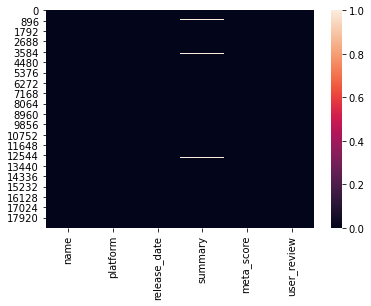

In [6]:
sns.heatmap(data.isnull())

In [7]:
data.isnull().sum()

name              0
platform          0
release_date      0
summary         114
meta_score        0
user_review       0
dtype: int64

In [8]:
data[data['summary'].isnull()]

name           platform  \
833           Injustice 2: Legendary Edition      PlayStation 4   
1472                      Moto Racer Advance   Game Boy Advance   
1535                              Mini Metro             Switch   
1649             Out of the Park Baseball 13                 PC   
2427              Guild Wars 2: Path of Fire                 PC   
...                                      ...                ...   
17999         One Piece: Unlimited Cruise SP      PlayStation 4   
18134                        AeternoBlade II              Wii U   
18253  Surgeon Simulator: Experience Reality      PlayStation 4   
18532                    The Ripping Friends   Game Boy Advance   
18717                      Smash 'N' Survive      PlayStation 3   

             release_date summary  meta_score user_review  
833        March 27, 2018     NaN          88         7.6  
1472     December 5, 2002     NaN          86         tbd  
1535      August 30, 2018     NaN          86         8.4  
1649        April 9, 2012     NaN          85         7.8  
2427   September 22, 2017     NaN          83         7.3  
...                   ...     ...         ...         ...  
17999   February 10, 2012     NaN          46         7.0  
18134    October 11, 2019     NaN          44         4.4  
18253    December 3, 2016     NaN          43         4.3  
18532      March 24, 2002     NaN          38         tbd  
18717   February 22, 2012     NaN          31         tbd  

[114 rows x 6 columns]

In [9]:
data = data.drop('summary', axis=1)

In [10]:
data

name        platform  \
0            The Legend of Zelda: Ocarina of Time     Nintendo 64   
1                        Tony Hawk's Pro Skater 2     PlayStation   
2                             Grand Theft Auto IV   PlayStation 3   
3                                     SoulCalibur       Dreamcast   
4                             Grand Theft Auto IV        Xbox 360   
...                                           ...             ...   
18795                    Fast & Furious: Showdown        Xbox 360   
18796                     Drake of the 99 Dragons            Xbox   
18797  Afro Samurai 2: Revenge of Kuma Volume One   PlayStation 4   
18798   Infestation: Survivor Stories (The War Z)              PC   
18799         Leisure Suit Larry: Box Office Bust              PC   

             release_date  meta_score user_review  
0       November 23, 1998          99         9.1  
1      September 20, 2000          98         7.4  
2          April 29, 2008          98         7.7  
3       September 8, 1999          98         8.4  
4          April 29, 2008          98         7.9  
...                   ...         ...         ...  
18795        May 21, 2013          22         1.3  
18796    November 3, 2003          22         1.7  
18797  September 22, 2015          21         2.9  
18798    October 15, 2012          20         1.7  
18799      March 31, 2009          20         2.0  

[18800 rows x 5 columns]

In [11]:
data = data.drop(data[data['user_review']=='tbd'].index)

In [12]:
data

name        platform  \
0            The Legend of Zelda: Ocarina of Time     Nintendo 64   
1                        Tony Hawk's Pro Skater 2     PlayStation   
2                             Grand Theft Auto IV   PlayStation 3   
3                                     SoulCalibur       Dreamcast   
4                             Grand Theft Auto IV        Xbox 360   
...                                           ...             ...   
18795                    Fast & Furious: Showdown        Xbox 360   
18796                     Drake of the 99 Dragons            Xbox   
18797  Afro Samurai 2: Revenge of Kuma Volume One   PlayStation 4   
18798   Infestation: Survivor Stories (The War Z)              PC   
18799         Leisure Suit Larry: Box Office Bust              PC   

             release_date  meta_score user_review  
0       November 23, 1998          99         9.1  
1      September 20, 2000          98         7.4  
2          April 29, 2008          98         7.7  
3       September 8, 1999          98         8.4  
4          April 29, 2008          98         7.9  
...                   ...         ...         ...  
18795        May 21, 2013          22         1.3  
18796    November 3, 2003          22         1.7  
18797  September 22, 2015          21         2.9  
18798    October 15, 2012          20         1.7  
18799      March 31, 2009          20         2.0  

[17435 rows x 5 columns]

In [13]:
data[data['meta_score']=='tbd']

Empty DataFrame
Columns: [name, platform, release_date, meta_score, user_review]
Index: []

In [14]:
data.isnull().sum()

name            0
platform        0
release_date    0
meta_score      0
user_review     0
dtype: int64

## Top by meta_score

In [15]:
top_meta_score = data.sort_values(['meta_score'], ascending = False)
top_meta_score[['name','meta_score']][:10]

name  meta_score
0                The Legend of Zelda: Ocarina of Time          99
2                                 Grand Theft Auto IV          98
3                                         SoulCalibur          98
4                                 Grand Theft Auto IV          98
1                            Tony Hawk's Pro Skater 2          98
14                           Tony Hawk's Pro Skater 3          97
23                                            NFL 2K1          97
22  The House in Fata Morgana - Dreams of the Reve...          97
21                               Halo: Combat Evolved          97
20                                Super Mario Odyssey          97

Text(0, 0.5, 'Name')

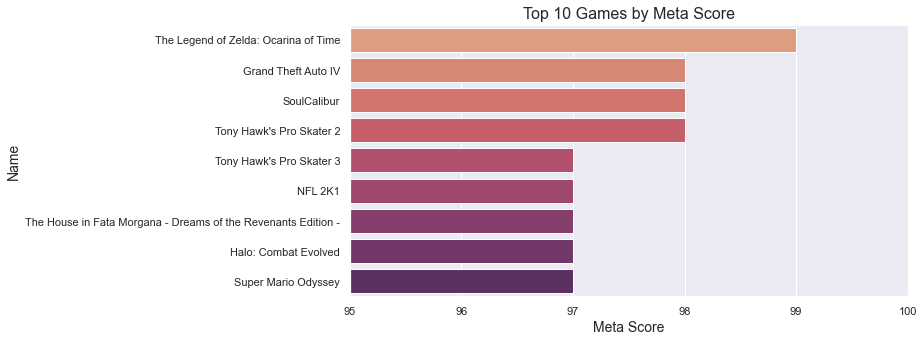

In [16]:
sns.set(style='darkgrid', color_codes=True)

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=top_meta_score['meta_score'][:10], y=top_meta_score['name'][:10], orient = 'h', palette='flare')
plt.xlim(95,100)
plt.title('Top 10 Games by Meta Score', fontsize=16)
plt.xlabel('Meta Score', fontsize=14)
plt.ylabel('Name', fontsize=14)

### Distribution of Meta Scores

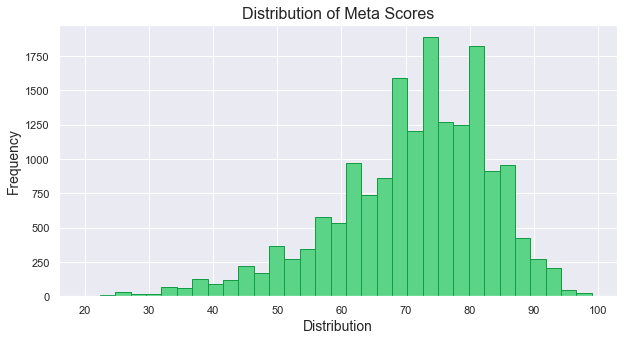

In [97]:
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(x=data['meta_score'], bins=33, facecolor='#5bd487', edgecolor='#139c44')
plt.title('Distribution of Meta Scores', fontsize=16)
plt.xlabel('Distribution', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

## Top by user_review

In [17]:
data['user_review'] = data['user_review'].astype(np.float)

In [18]:
data.dtypes

name             object
platform         object
release_date     object
meta_score        int64
user_review     float64
dtype: object

In [19]:
top_user_score = data.sort_values(['user_review'], ascending=False)
top_user_score[['name','user_review']][:10]

name  user_review
3504   Z.H.P. Unlosing Ranger vs Darkdeath Evilman          9.7
2450                Ghost Trick: Phantom Detective          9.7
4953                                       Rochard          9.7
14836                                Metal Torrent          9.7
9550                           After Burner Climax          9.7
4844                                  GrimGrimoire          9.7
10936                                      Tengami          9.7
12434                                      Crystar          9.6
4573                                  Superliminal          9.6
7638                                  Superliminal          9.6

Text(0, 0.5, 'Name')

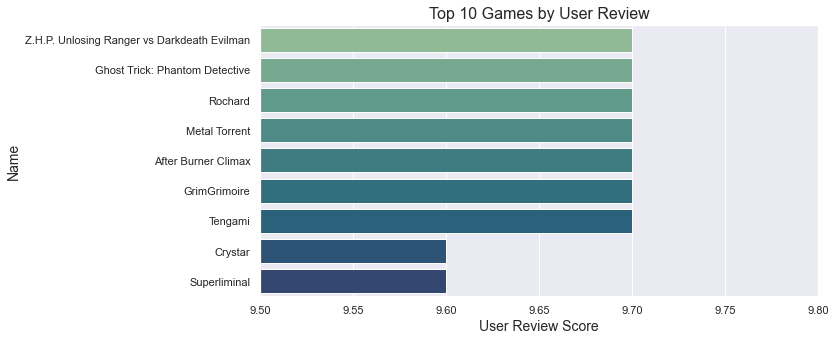

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=top_user_score['user_review'][:10], y=top_user_score['name'][:10], orient='h', palette='crest')
plt.xlim(9.5, 9.8)
plt.title('Top 10 Games by User Review', fontsize=16)
plt.xlabel('User Review Score', fontsize=14)
plt.ylabel('Name', fontsize=14)

### Distribution of User Reviews

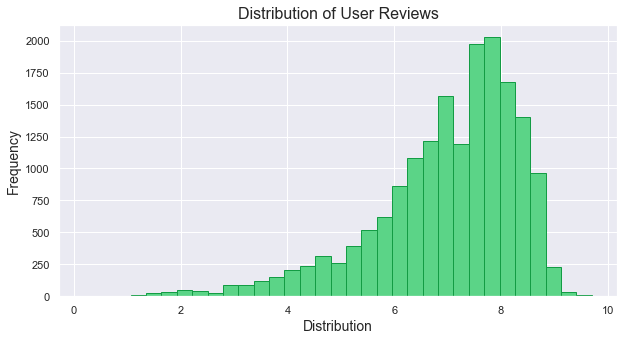

In [98]:
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(x=data['user_review'], bins=33, facecolor='#5bd487', edgecolor='#139c44')
plt.title('Distribution of User Reviews', fontsize=16)
plt.xlabel('Distribution', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

## Count by platform

In [21]:
data['platform'].value_counts()

 PC                  4660
 PlayStation 4       1950
 Xbox 360            1547
 PlayStation 2       1311
 Switch              1216
 PlayStation 3       1208
 Xbox One            1089
 Xbox                 686
 DS                   599
 Wii                  597
 PSP                  464
 GameCube             413
 3DS                  378
 Game Boy Advance     349
 PlayStation Vita     251
 Wii U                181
 PlayStation          166
 Dreamcast            119
 PlayStation 5        110
 Nintendo 64           71
 Xbox Series X         65
 Stadia                 5
Name: platform, dtype: int64

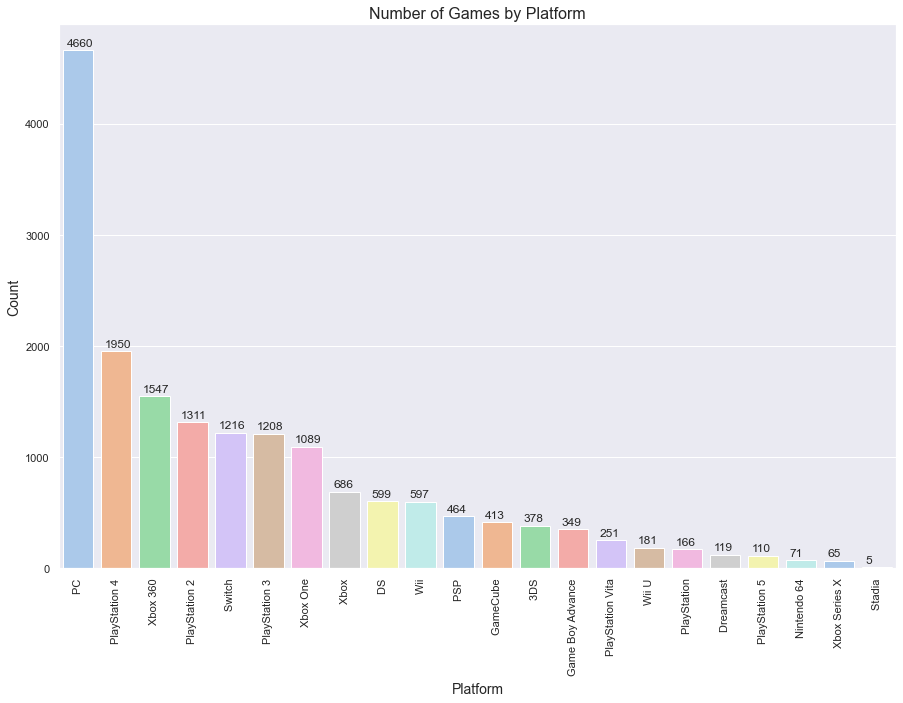

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(x=data['platform'], order=data['platform'].value_counts().index, palette='pastel')
plt.xticks(rotation=90)
plt.title('Number of Games by Platform',fontsize=16)
plt.xlabel('Platform',fontsize=14)
plt.ylabel('Count',fontsize=14)

for p in ax.patches:
    x = p.get_x() + p.get_width() - 0.7
    y = p.get_y() + p.get_height() + 40
    value = '{}'.format(p.get_height())
    ax.text(x, y, value, fontsize=12)

## Count by Year

In [23]:
data

name        platform  \
0            The Legend of Zelda: Ocarina of Time     Nintendo 64   
1                        Tony Hawk's Pro Skater 2     PlayStation   
2                             Grand Theft Auto IV   PlayStation 3   
3                                     SoulCalibur       Dreamcast   
4                             Grand Theft Auto IV        Xbox 360   
...                                           ...             ...   
18795                    Fast & Furious: Showdown        Xbox 360   
18796                     Drake of the 99 Dragons            Xbox   
18797  Afro Samurai 2: Revenge of Kuma Volume One   PlayStation 4   
18798   Infestation: Survivor Stories (The War Z)              PC   
18799         Leisure Suit Larry: Box Office Bust              PC   

             release_date  meta_score  user_review  
0       November 23, 1998          99          9.1  
1      September 20, 2000          98          7.4  
2          April 29, 2008          98          7.7  
3       September 8, 1999          98          8.4  
4          April 29, 2008          98          7.9  
...                   ...         ...          ...  
18795        May 21, 2013          22          1.3  
18796    November 3, 2003          22          1.7  
18797  September 22, 2015          21          2.9  
18798    October 15, 2012          20          1.7  
18799      March 31, 2009          20          2.0  

[17435 rows x 5 columns]

In [24]:
data['release_year'] = pd.DatetimeIndex(data['release_date']).year

In [25]:
data

name        platform  \
0            The Legend of Zelda: Ocarina of Time     Nintendo 64   
1                        Tony Hawk's Pro Skater 2     PlayStation   
2                             Grand Theft Auto IV   PlayStation 3   
3                                     SoulCalibur       Dreamcast   
4                             Grand Theft Auto IV        Xbox 360   
...                                           ...             ...   
18795                    Fast & Furious: Showdown        Xbox 360   
18796                     Drake of the 99 Dragons            Xbox   
18797  Afro Samurai 2: Revenge of Kuma Volume One   PlayStation 4   
18798   Infestation: Survivor Stories (The War Z)              PC   
18799         Leisure Suit Larry: Box Office Bust              PC   

             release_date  meta_score  user_review  release_year  
0       November 23, 1998          99          9.1          1998  
1      September 20, 2000          98          7.4          2000  
2          April 29, 2008          98          7.7          2008  
3       September 8, 1999          98          8.4          1999  
4          April 29, 2008          98          7.9          2008  
...                   ...         ...          ...           ...  
18795        May 21, 2013          22          1.3          2013  
18796    November 3, 2003          22          1.7          2003  
18797  September 22, 2015          21          2.9          2015  
18798    October 15, 2012          20          1.7          2012  
18799      March 31, 2009          20          2.0          2009  

[17435 rows x 6 columns]

In [26]:
data['release_year'].value_counts()

2018    1091
2017     994
2019     974
2020     957
2016     944
2009     866
2007     848
2008     844
2015     840
2011     824
2006     805
2005     796
2010     789
2012     782
2014     764
2013     756
2003     728
2004     667
2002     666
2021     562
2001     485
2000     309
1999      52
1998      43
1997      28
1996      20
1995       1
Name: release_year, dtype: int64

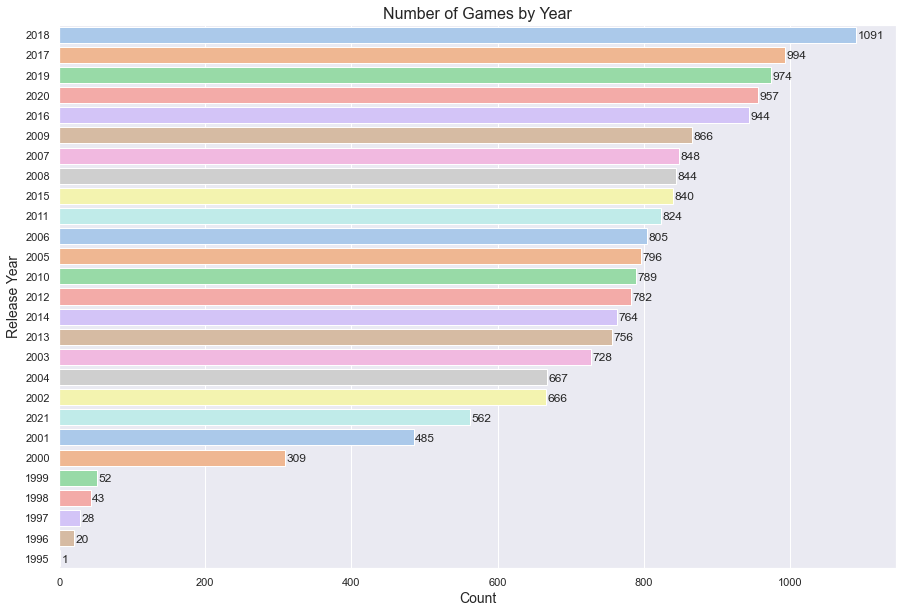

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(y=data['release_year'], order=data['release_year'].value_counts().index, orient='h', palette='pastel')
plt.title('Number of Games by Year', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Release Year', fontsize=14)

for p in ax.patches:
    x = p.get_x() + p.get_width() + 2
    y = p.get_y() + p.get_height() - 0.2
    value = '{}'.format(p.get_width())
    ax.text(x, y, value, fontsize=12)

## Count by Month

In [34]:
data['release_month'] = pd.DatetimeIndex(data['release_date']).month_name()

In [35]:
data

name        platform  \
0            The Legend of Zelda: Ocarina of Time     Nintendo 64   
1                        Tony Hawk's Pro Skater 2     PlayStation   
2                             Grand Theft Auto IV   PlayStation 3   
3                                     SoulCalibur       Dreamcast   
4                             Grand Theft Auto IV        Xbox 360   
...                                           ...             ...   
18795                    Fast & Furious: Showdown        Xbox 360   
18796                     Drake of the 99 Dragons            Xbox   
18797  Afro Samurai 2: Revenge of Kuma Volume One   PlayStation 4   
18798   Infestation: Survivor Stories (The War Z)              PC   
18799         Leisure Suit Larry: Box Office Bust              PC   

             release_date  meta_score  user_review  release_year release_month  
0       November 23, 1998          99          9.1          1998      November  
1      September 20, 2000          98          7.4          2000     September  
2          April 29, 2008          98          7.7          2008         April  
3       September 8, 1999          98          8.4          1999     September  
4          April 29, 2008          98          7.9          2008         April  
...                   ...         ...          ...           ...           ...  
18795        May 21, 2013          22          1.3          2013           May  
18796    November 3, 2003          22          1.7          2003      November  
18797  September 22, 2015          21          2.9          2015     September  
18798    October 15, 2012          20          1.7          2012       October  
18799      March 31, 2009          20          2.0          2009         March  

[17435 rows x 7 columns]

In [37]:
from collections import Counter
count = Counter(data['release_month'])
count = count.most_common()
count

[('October', 2324),
 ('November', 2199),
 ('September', 1942),
 ('March', 1743),
 ('June', 1426),
 ('August', 1350),
 ('May', 1286),
 ('February', 1251),
 ('April', 1133),
 ('July', 1054),
 ('December', 894),
 ('January', 833)]

In [32]:
by_month = pd.DataFrame(count, columns=['Month', 'Count'])
by_month

Month  Count
0     October   2324
1    November   2199
2   September   1942
3       March   1743
4        June   1426
5      August   1350
6         May   1286
7    February   1251
8       April   1133
9        July   1054
10   December    894
11    January    833

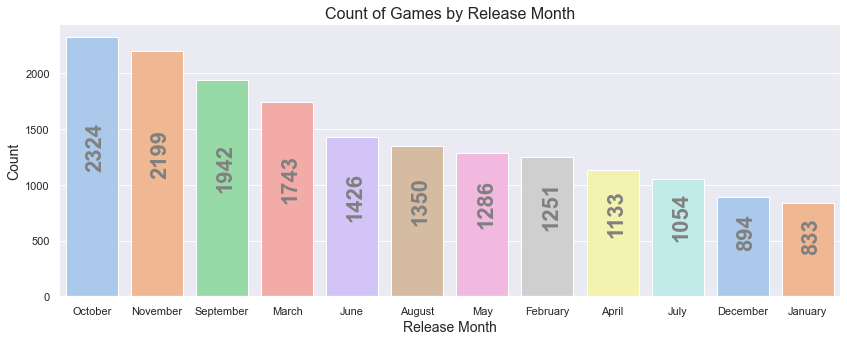

In [33]:
fig, ax = plt.subplots(figsize=(14,5))
sns.barplot(x=by_month['Month'], y=by_month['Count'], palette='pastel')
plt.title('Count of Games by Release Month',fontsize=16)
plt.xlabel('Release Month',fontsize=14)
plt.ylabel('Count',fontsize=14)

for p in ax.patches:
    x = p.get_x() + p.get_width() - 0.5
    y = p.get_y() + p.get_height() / 2
    value = '{:.0f}'.format(p.get_height())
    ax.text(x, y, value, fontsize=22, fontweight='bold', rotation=90, color='gray')